<a href="https://colab.research.google.com/github/mileslilly2/code_for_whatever_you_are/blob/main/eonomctrics_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ──────────────────────────────────────────────────────────────────────────────
#  QUICK ECONOMETRICS & VISUALIZATION PRIMER (PYTHON / COLAB)
#  Dataset: EIA Weekly Coal Production by State 2016-2023 (West Virginia slice)
#  Source: U.S. Energy Information Administration                                          (see citation)
# ──────────────────────────────────────────────────────────────────────────────
# 1. Setup – install core packages (quiet = no chatty output)
!pip install -q pandas statsmodels matplotlib seaborn requests


In [ ]:

# 2. Imports
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, statsmodels.formula.api as smf



In [ ]:
# 3. Grab the table straight from the EIA page
URL = "https://www.eia.gov/coal/production/weekly/"
tbl = pd.read_html(URL, flavor="lxml")[0]           # first table on the page
tbl.columns = ["State", "Y2018", "Y2017", "Y2016"]  # rename for clarity


In [ ]:
tbl = pd.read_html(URL, flavor="lxml")[0]

In [ ]:
tbl

,State,2018 Annual Production,2017 Annual Production,2016 Annual Production
0,Alabama,14783,12861,9643
1,Alaska,902,959,932
2,Arizona,6550,6221,5423
3,Arkansas,0,43,49
4,Colorado,14026,15047,12634
5,Illinois,49482,48204,43422
6,Indiana,34598,31472,28767
7,Kansas,0,0,27
8,Kentucky,39740,41784,42868
9,Louisiana,1483,2079,2798


In [ ]:
tbl.columns = ["State", "Y2018", "Y2017", "Y2016"]  # rename for clarity

In [ ]:
tbl

,State,Y2018,Y2017,Y2016
0,Alabama,14783,12861,9643
1,Alaska,902,959,932
2,Arizona,6550,6221,5423
3,Arkansas,0,43,49
4,Colorado,14026,15047,12634
5,Illinois,49482,48204,43422
6,Indiana,34598,31472,28767
7,Kansas,0,0,27
8,Kentucky,39740,41784,42868
9,Louisiana,1483,2079,2798


In [ ]:

# 4. Tidy & filter for West Virginia
wv = (tbl.query("State == 'West Virginia'")
          .melt(id_vars="State", var_name="Year", value_name="Coal_Prod_1000t"))
wv["Year"] = wv["Year"].str[1:].astype(int)         # strip leading 'Y'
wv["Coal_Prod_1000t"] = pd.to_numeric(wv["Coal_Prod_1000t"])



In [ ]:
wv

,State,Year,Coal_Prod_1000t
0,West Virginia,2018,95510
1,West Virginia,2017,92791
2,West Virginia,2016,79757


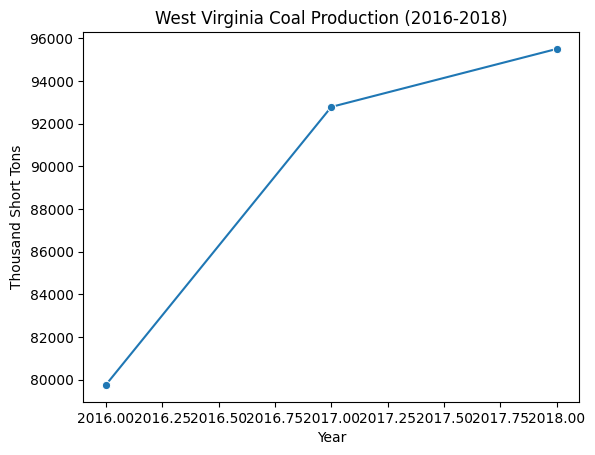

In [ ]:
# 5. Quick visualization
sns.lineplot(data=wv, x="Year", y="Coal_Prod_1000t", marker="o")
plt.title("West Virginia Coal Production (2016-2018)")
plt.ylabel("Thousand Short Tons")
plt.show()



In [ ]:
# 6. Simple OLS trend (robust SE)
mod = smf.ols("Coal_Prod_1000t ~ Year", data=wv).fit(cov_type="HC1")
print(mod.summary())

# 7. Next steps (uncomment as needed):
#    ▸ Add additional years via the same page (2020–2024 rows appear farther down the HTML)
#    ▸ Merge in WV mining employment from FRED: 'CLZCEU2391480101'
#    ▸ Try a log-log specification: smf.ols("np.log(Coal_Prod_1000t) ~ Year", data=wv).fit()


                            OLS Regression Results                            
Dep. Variable:        Coal_Prod_1000t   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     13.99
Date:                Thu, 05 Jun 2025   Prob (F-statistic):              0.166
Time:                        00:06:38   Log-Likelihood:                -27.645
No. Observations:                   3   AIC:                             59.29
Df Residuals:                       1   BIC:                             57.49
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.58e+07   4.25e+06     -3.720      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
